In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
content = pd.read_csv('data/movie_titles3.csv', index_col=False, names = ['id', 'year', 'title'])
content.head()

/var/folders/xc/4fn08svj2dgdk_3wj3xkp_rr0000gn/T/ipykernel_28671/3666075594.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  content = pd.read_csv('data/movie_titles3.csv', index_col=False, names = ['id', 'year', 'title'])


,id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [3]:
content['year'].describe()

count    17763.000000
mean      1990.263694
std         16.507891
min       1896.000000
25%       1985.000000
50%       1997.000000
75%       2002.000000
max       2005.000000
Name: year, dtype: float64

# Year Release

I'm assuming that people identify heavily with the content that they grew up with or a certain styles of content. For that reason, I'm going to bin films by decade.

However, considering the low outliers anything before 1960 will be binned together. Q1 - 1.5IQR

In [34]:
def decade(row):
    
    """
    bins years by decade, 1959 and before are binned together
    """
    if row['year'] <= 1959:
        return str(0)
    elif 1960 <= row['year'] < 1969:
        return str(1960)
    elif 1970 <= row['year'] < 1979:
        return str(1970)
    elif 1980 <= row['year'] < 1989:
        return str(1980)
    elif 1990 <= row['year'] < 1999:
        return str(1990)
    else:
        return str(2000)

In [32]:
#bin years

content['decade'] = content.apply(decade, axis=1)
content

,id,year,title,decade
0,1,2003.0,Dinosaur Planet,2000
1,2,2004.0,Isle of Man TT 2004 Review,2000
2,3,1997.0,Character,1990
3,4,1994.0,Paula Abdul's Get Up & Dance,1990
4,5,2004.0,The Rise and Fall of ECW,2000
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,2000
17766,17767,2004.0,Fidel Castro: American Experience,2000
17767,17768,2000.0,Epoch,2000
17768,17769,2003.0,The Company,2000


In [27]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      17770 non-null  int64  
 1   year    17763 non-null  float64
 2   title   17770 non-null  object 
 3   decade  17770 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 555.4+ KB


In [35]:
# decade counts
content['decade'].value_counts(sort=True)

decade
2000    8459
1990    4208
1980    1860
0       1246
1970    1151
1960     846
Name: count, dtype: int64

<BarContainer object of 6 artists>

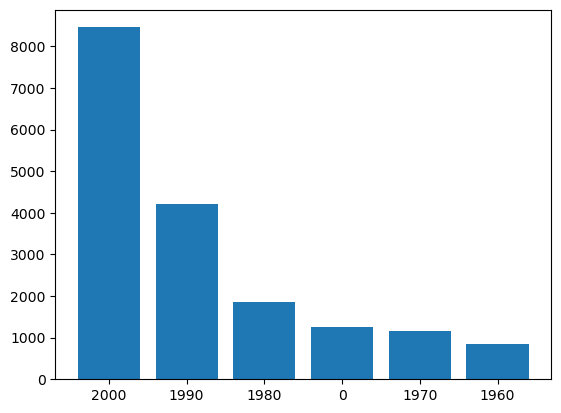

In [30]:
plt.bar((content['decade'].value_counts(sort=True).index), (content['decade'].value_counts(sort=True).values))

In [36]:
content = content.drop(['year'], axis = 1)
content.head()

,id,title,decade
0,1,Dinosaur Planet,2000
1,2,Isle of Man TT 2004 Review,2000
2,3,Character,1990
3,4,Paula Abdul's Get Up & Dance,1990
4,5,The Rise and Fall of ECW,2000
